<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA<br>Due: June 14, 2020, 23:59</center></h1>

- **Student ID1:** **2015401183**
- **Student ID2:** **2015300084**

In this project, you are going to implement two unsupervised learning techniques. In the first task, you are asked to implement **k-means clustering** algorithm using the data provided in `kmeans_data.zip`. In the second task, you need to implement **PCA** and apply dimensionality reduction on the data provided in `USPS.mat`. 

# (50 pts) Task 1: K-Means Clustering

Please download `kmeans_data.zip`. In this problem, ground truth cluster assignments are given in `labels.npy`. 

## (10 pts) Task 1.1: Plot Clusters

Plot the data using scatter plot. Assign different colors to different classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
training_data=np.load('/Users/egeonurgulec/Downloads/deliverables/kmeans_data/data.npy')
training_labels=np.load('/Users/egeonurgulec/Downloads/deliverables/kmeans_data/label.npy')

In [3]:
#training_data
#np.shape(training_data)

In [4]:
#training_labels
#np.shape(training_labels)

In [5]:
x1=training_data[:,0]#feature 1
x2=training_data[:,1]#feature 2

Text(0.5, 1.0, 'Ground Truth Cluster Assignments')

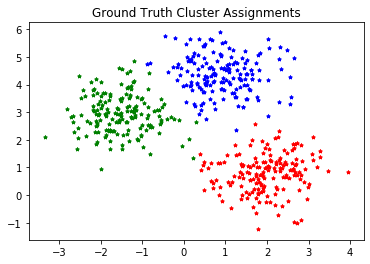

In [6]:
plt.scatter(x1[training_labels==0],x2[training_labels==0],color='blue', s = 13, marker = "*")
plt.scatter(x1[training_labels==1],x2[training_labels==1],color='red', s = 13, marker = "*")
plt.scatter(x1[training_labels==2],x2[training_labels==2],color='green', s = 13, marker = "*")
plt.title('Ground Truth Cluster Assignments')

## (30 pts) Task 1.2: K-Means Implementation

Implement k-means clustering algorithm by yourself using the number of iterations as the stopping condition. You can use built-in functions only for side-tasks such as norm computation, minimum element search and mean calculation, not for the clustering itself.

In [7]:
def k_means(init_centers,training_data,itr_nr):
    #takes initial centers, training data and iteration number
    #returns centers and clusters
    
    centers = init_centers #centers initilization
    for itr in range(itr_nr):
        clusters= [] #empty cluster list
        for cluster in range(3):
            #for 3 cluster
            new_cluster = []
            clusters.append(new_cluster)
        for sample in training_data:
            euclidian_distances = np.zeros((3,1))#distances to each center(3 centers)
            for cluster in range(3):
                euclidian_distances[cluster] = np.linalg.norm(sample - centers[cluster])
            proper_cluster=np.argmin(euclidian_distances)#closest cluster center
            clusters[proper_cluster].append(sample)#sample is added to closest center's cluster
        for cluster in range(3):
            centers[cluster] = np.average(clusters[cluster], axis = 0)#center update
        #print(itr,centers)
    return centers, clusters      

## (10 pts) Taks 1.3: Evaluation

Run k-means $9$ times with number of iterations $(N)$ $= \{1, 2, ..., 9\}$. Plot the final clustering assignments as a scatter plot for each run as 3x3 `matplotlib subplot`. Visually investigate the effect of the number of iterations on obtaining the optimal clustering and find the convergence point by comparing the plots with the one in Task 1.1. If the model does not converge at $9$ iterations, you can select $9$ other $N$ to effectively show the progress of the clustering.

For a fair comparison, start each run with the same initial random assignments. You can use `np.random.seed(1)` to this purpose.

In [8]:
np.random.seed(1)
initial_seeds=np.random.randint(500,size=3)#initial seeds' indeces
initial_seeds
init_centers = np.zeros((3,2))#initial centers are initial seeds
for i in range(3):
    init_centers[i]=training_data[initial_seeds[i]]

In [9]:
centers= np.zeros((9,3,2))#center list for 9 iterations and 3 clusters (2 features)
clusters=[]#cluster list for 9 iterations and 3 clusters
for itr_nr in range(9):#each iteration
    for i in range(3):#each cluster
        init_centers[i]=training_data[initial_seeds[i]]#center initialization
    temp_center, temp_cluster  = k_means(init_centers,training_data,itr_nr+1)#k-means clustering
    clusters.append(temp_cluster)#cluster is added to the list
    centers[itr_nr,:,:] = temp_center#center is added to the list

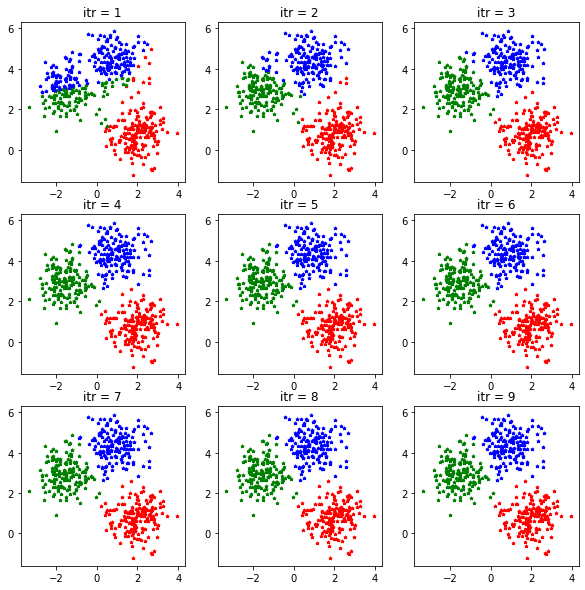

In [10]:
plt.figure(figsize=(10,10))
for itr_nr in range(9):
    #clusters for iteration "itr_nr+1"
    plt.subplot(3, 3, itr_nr+1)
    plt.title('itr = ' + str(itr_nr+1))
    
    cluster1 = np.array( clusters[itr_nr][0])
    cluster2 = np.array( clusters[itr_nr][1])
    cluster3 = np.array( clusters[itr_nr][2])
        
    plt.scatter(cluster1[:,0],cluster1[:,1],color='r', s = 10, marker = "*")
    plt.scatter(cluster2[:,0],cluster2[:,1],color='g', s = 10, marker = "*")
    plt.scatter(cluster3[:,0],cluster3[:,1],color='b', s = 10, marker = "*")
    
    #center1 = np.array( centers[itr_nr][0])
    #center2 = np.array( centers[itr_nr][1])
    #center3 = np.array( centers[itr_nr][2])
        
    #plt.scatter(center1[0],center1[1],color='black', s = 100, marker = "x")
    #plt.scatter(center2[0],center2[1],color='black', s = 100, marker = "x")
    #plt.scatter(center3[0],center3[1],color='black', s = 100, marker = "x")
plt.show()


# (50 pts) Task 2: Principal Component Analysis (PCA)

Please load the whole dataset in `USPS.mat` using the function `loadmat` in `Scipy.io`. The matrix $A$ contains all the images of size 16 by 16. Each of the 3000 rows in $A$ corresponds to the image of one handwritten digit (between 0 and 9).

In [11]:
datas=loadmat('/Users/egeonurgulec/Downloads/deliverables/USPS.mat')
training_data=datas['A']

In [12]:
#training_data.shape

## (30 pts) Task 2.1: PCA Implementation

Implement PCA and apply it to the data using $d = 50, 100, 200, 300$ principal components. You are not allowed to use an existing implementation. You can use existing packages for eigen-decomposition. **Do not forget to standardize the data before eigen-decomposition.**

In [13]:
def find_construct_data_G_mat(training_data,d):
    #takes training data and d,
    #returns constructed training data matrix and transformation matrix
    
    #standardization of training matrix
    mean=np.mean(training_data,axis=0)
    training_data_standardized=(training_data-mean)
    
    #covariance matrix S
    S_mat=np.cov(training_data_standardized,rowvar=0)
    eigen_values, eigen_vectors = np.linalg.eig(S_mat)
    eigen_values_sorted_index=np.argsort(-eigen_values)
    
    #transformation matrix G
    G_mat = eigen_vectors[:,eigen_values_sorted_index[:d]]
    
    #constructed training matrix
    constructed_training_data =training_data.dot(G_mat)
    
    return constructed_training_data,G_mat

In [14]:
d_list = [50,100,200,256]

In [15]:
constructed_training_datas = [] #constructed training data list for d list (50, 100, 200, 256)
G_mats = [] #transformation matrix G list for d list (50, 100, 200, 256)
for d in d_list:
    constructed_training_data,G_mat = find_construct_data_G_mat(training_data,d)#construction
    constructed_training_datas.append(constructed_training_data)
    G_mats.append(G_mat)

## (15 pts) Task 2.2: Image Reconstruction

Reconstruct images using the selected principal components from Task 2.1

In [16]:
def find_reconstruct_data(constructed_training_data,G_mat):
    #takes constructed training data matrix and transformation matrix G
    #returns reconstructed training data
    
    reconstructed_training_data = constructed_training_data.dot(G_mat.T)
    return reconstructed_training_data

In [17]:
reconstructed_training_datas = [] #reconstructed training data list for d list (50, 100, 200, 256)
for i in range(np.size(d_list)):
    reconstructed_training_data = find_reconstruct_data(constructed_training_datas[i],G_mats[i])#reconstruction
    reconstructed_training_datas.append(reconstructed_training_data)

## (5 pts) Task 2.3: Evaluation

Visualize the reconstructed images for the images at indices $i = 0, 500, 1000, 2000$ for $d=50, 100, 200, 300$. Create a 4x5 subplot where the rows correspond to images at each index, first four columns correspond to reconstructed images using each $d$ and the last column is the raw image, i.e. before PCA. Comment on your results.

In [18]:
index_list = [0,500,1000,2000]

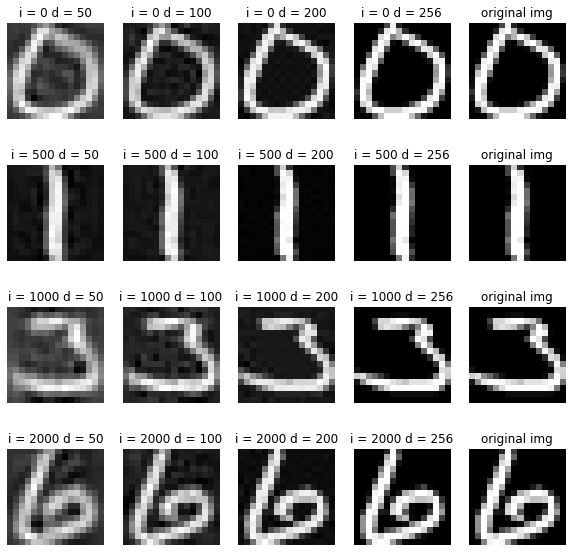

In [19]:
nr_index = np.size(index_list)
nr_samples = np.size(d_list)+1 # number of d + original image

#plot
plt.figure(figsize=(10,10))#plot size
for i in range(np.size(index_list)):#each index at index list
    for j in range(np.size(d_list)):#each d at d list
        img = reconstructed_training_datas[j][index_list[i]].reshape((16,16))
        #reconstructed image with index index_list[i] and d = d_list[j] 
        img_index = i*nr_samples + j + 1
        plt.subplot(nr_index, nr_samples, img_index)
        plt.title('i = ' + str(index_list[i]) + ' d = ' + str(d_list[j]) )
        plt.axis('off')
        plt.imshow(img, cmap='gray')
        
    img = training_data[index_list[i]].reshape((16,16))#original image with index_list[i]
    img_index = i*nr_samples + j + 2
    plt.subplot(nr_index, nr_samples, img_index)
    plt.title('original img')
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()